## Gradiente Conjugado.
### Introduccion.
La idea de Magnus Hesteness, Eduard Stiefel publicacron en 1952
[este metodo](https://nvlpubs.nist.gov/nistpubs/jres/049/jresv49n6p409_A1b.pdf) que es muy ingenioso. Corenlius Lanczos tambien en el mismo anho visualizo el algoritmo.

La idea es por que no converger en dos pasos en 2D.

Para explicar la idea tomemos la siguiente Figura 3.9


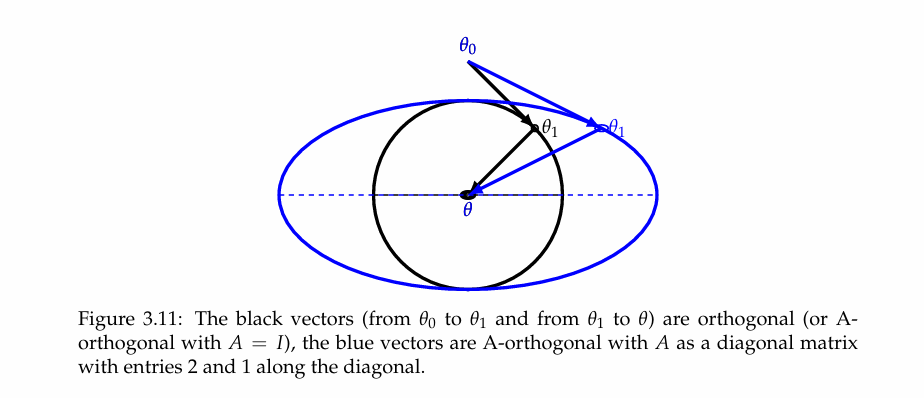

Multiplico el circulo por la matriz
$$\begin{pmatrix} 2 & 0 \\ 0 & 1  \end{pmatrix}  $$

En un plano, para poder llegar directamente al centro se tiene que definir una nueva ortogonalidad. Esta se define con un producto interno extendido

$$\langle x , y \rangle_A = x^* A y  $$
Dos vectores $x,y$ son $A$-ortogonales si $\langle x, y \rangle_A = 0$.
Es claro que si $A=I$ se reduce a la ortogonalidad clasica.

Con esto en 2D (el dominio) converge en 2 pasos.
En 3D que pasa?



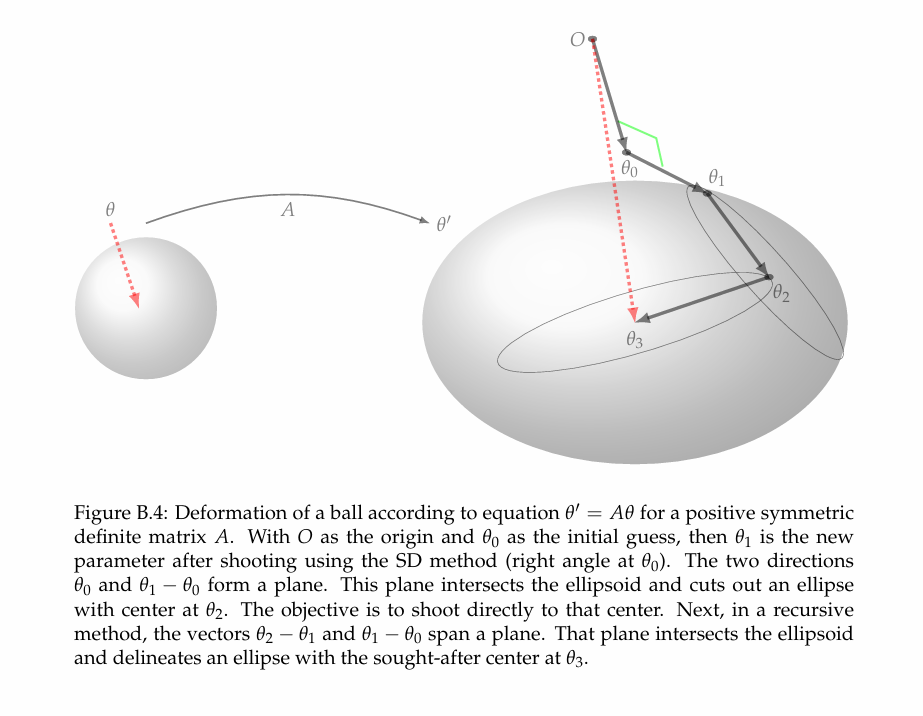

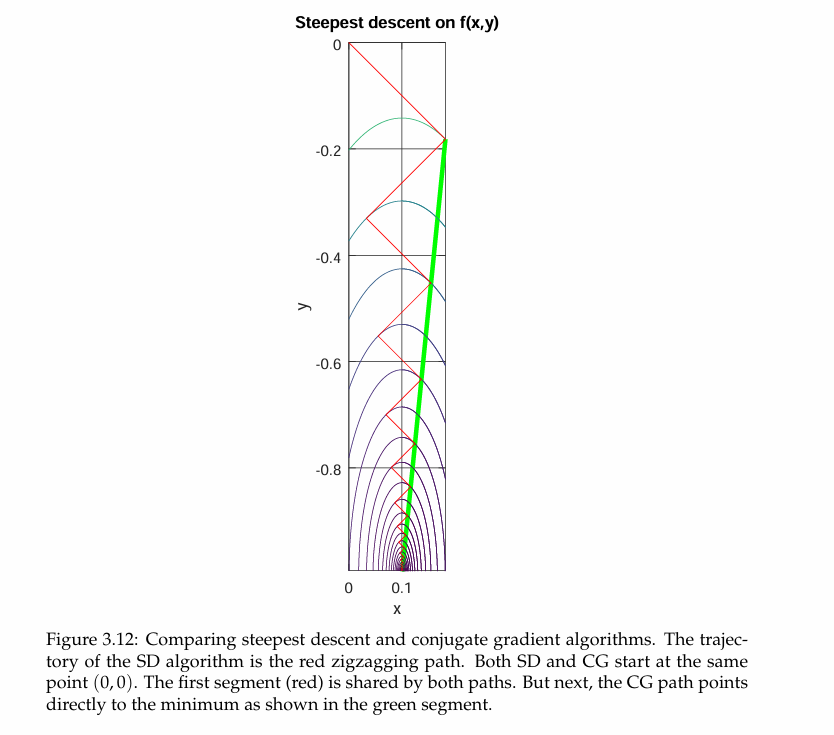

En la Figura 3.12 se observa las lineas rojas correponden a SD y las verdes (solo 2) a CG.

La idea es que solo necesito 3 iteraciones para el dominio en $\mathbb{R}^3$
y en general $n$ iteraciones en $\mathbb{R}^3$. Para resolver $Ax = b$.
Que pasa para hallar el m'inimo de funciones mas generales.
Tanto en SD como CG hay $\alpha$ analiticos. Para funciones mas generales  existen?  $\alpha$ analisitos. Veamos estrategias:

**Line search**: Cuando explique SD definite una funcion

$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] $$
Esta funci'on puede tener un minimo para $\alpha$, pero la funcion no necesariamente es analitica. Entonces que hacemos?

Estrategias:
* Tratar 3 valores diferentes para $\alpha$ y hacer una interpolacion parabolica donde encontramos el minimo.

* Backtracking: Se escoge un valor de $\alpha$ y se comienza a aumentar, por ejemplo $\alpha=0.001, 0.01, 0.1$ y asi hasta ver como converge mejor el sistema. A este algoritmo en Matlab se llama `so_step_armijo`  debido al autor Larry Armijo.

* Prueba y error.

* Metodos m'as sofisticados de gradiente no lineal como el L-BFGS.

Vamos a abandonar todos estos metodos que hemos discutido por que en el memento las redes neuronales usan otros metodos mas practicos pero tambien basados en el gradiente.

La idea siempre esta en iterar con la ecuacion

$$\theta^{(i)} = \theta^{(i-1)} - \alpha \nabla J(\theta^{(i)}) $$

El algoritmo es simple.


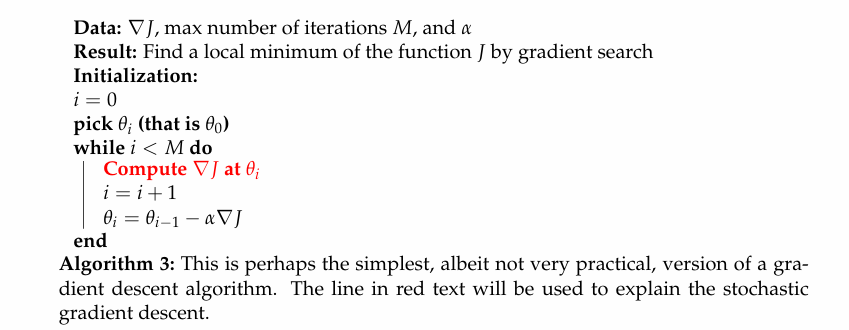

### ejemplo en Python
Tomemos la funcion $f(x)= x^4$
la derivada $\nabla f(x) = f'(x) = \frac{df}{dx} = 3 x^2$.
Debo implementar el Algoritmo 3 con la ecuacion

$$x_i = x_{i-1} - \alpha (3 x_{i-1}^2) $$

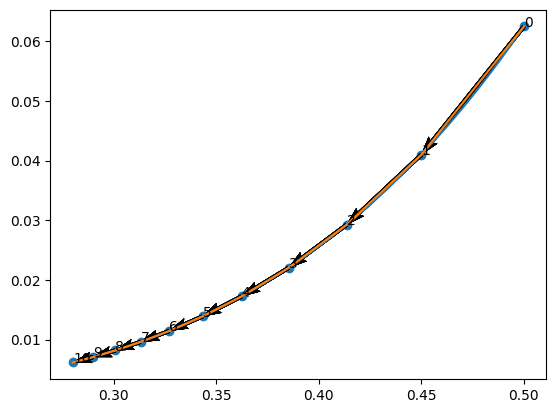

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gradDescent(f, gradf, x, alpha, M):

    x_0 = x
    xlist = [x]
    ylist = [f(x)]

    for i in range(M):
        x = x - alpha*gradf(x)
        xlist.append(x)
        ylist.append(f(x))

    # make plots
    xdomain = np.linspace( min(xlist), max(xlist), 100)

    plt.plot(xdomain, f(xdomain))

    plt.plot(xlist, ylist)
    plt.scatter(xlist, ylist)

    # para flechas usamos arreglos
    xarr = np.array(xlist)
    yarr = np.array(ylist)

    n = len(xarr)

    # for i in range(len(xlist)-1):
    for i in range(n):
        plt.quiver(xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1],  scale_units='xy', angles='xy', scale=1)
        plt.annotate(i, (xarr[i], yarr[i]))

    return

def f(x):
    return x**4

def gradf(x):
    return 4*x**3

M=10
x=0.5
alpha=0.1

gradDescent(f, gradf, x, alpha, M)
plt.show()

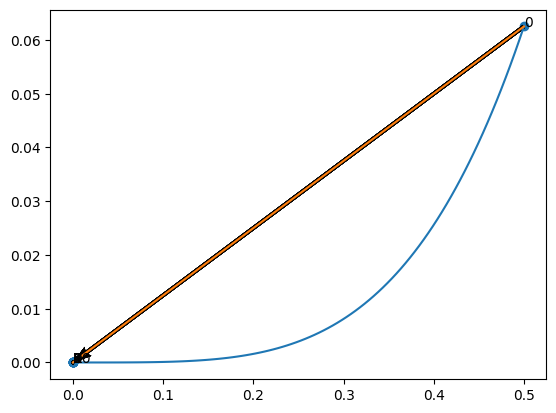

In [10]:
# alpha=1 me da SD.
alpha=1
gradDescent(f, gradf, x, alpha, M)
plt.show()

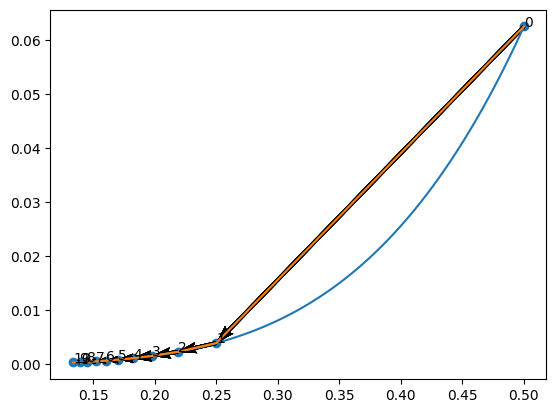

In [14]:
# alpha = 1.2
alpha=0.5
gradDescent(f, gradf, x, alpha, M)
plt.show()

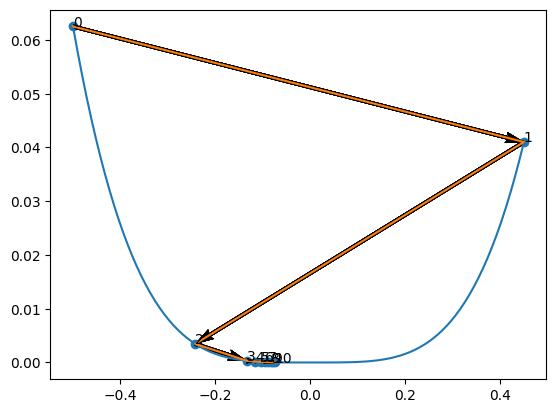

In [23]:
x=-0.5
alpha=1.9
M=10

gradDescent(f, gradf, x, alpha, M)
plt.show()

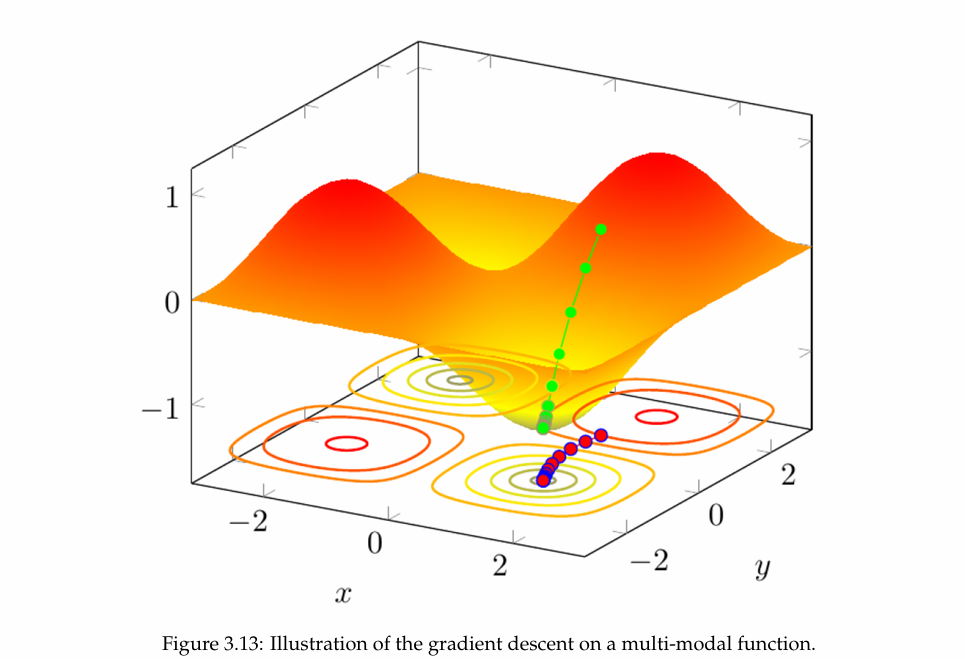

## Gradiente estocastico: Stochastic Gradient Descent.
### Motivacion
Veamos el siguiente ejemplo de redes neuronales (no las hemos visto pero explico lo que puedo dentro del ejemplo)

* Supongamos una red neuronal con 10 capas ocultas y una de entrada.
* Los datos de entrada son 10000 imagenes. Cada imagen puede terner 100x100 pixeles. Para imagenes en gris cada pixel tiene un valor. Si es RGB (Red Green Blue) 3 valores. Vamos a pensar en imagenes grises.

* Capa capa puede tener 100 neuronas.

Vamos a hacer combinatoria para contar el numero total de derivadas parciales.

El segundo numeral $$ 10 000 \times 100 \times 100 = 10^8 $$
datos de entrada.
Para los pesos:
$$pesos = 10^8 \times 100^{10} = 10^{28} $$
Derivadas parciales.

Para entender como atacar este problema vamos a formular varias funciones de costo y como se calcula el gradiente en ellas.

* **Problema de minimos cuadrados**: (continuo)

$$J(x, A, y) = \frac12 \| Ax - y \|^2 = \frac12 \sum_{i=1}^m
\left (  \sum_{j=1}^n ( a_{ij} x_j - y_i \right )^2  $$

Podemos escribir entonces

$$J(x,A, y) = \frac1m \sum_{i=1}^m C_i(x, A, y) $$
donde
$$C(x, A, y) = \frac{m}{2} \left ( \sum_{j=1}^n (a_{ij} x_j - y_i \right )^2 $$

**Regresion Logistica**: En la proxima clase vemos la regresion logistica.
La funcion de costo para esta es:

$$J(\theta, x, y) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}] $$

Esta funci'on de costo se puede escribir como

$$J(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(\theta, x , y) $$
donde
$$C_i(\theta, x, y) = - \left [  y_i \log[ h(\theta, x^{(i)}] + (1 -y_i) \log [ 1 - h(\theta, x^{(i)}]  \right ] $$

Si en adici'on queremos regularizacion debemos sumar

$$ \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2 $$
pero este no es problema por que la derivada de esta funci'on es simple.

$$\frac{\partial }{\theta_k} \left ( \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2 \right )  = \frac{\lambda}{2m} 2  \sum_{i=1}^n \theta_i \delta_{ki} = \frac{\lambda}{m} \theta_k $$

En general vemos que una funcion de costo para $m$ muestras se puede ver como

$$J(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(\theta, x, y) $$
Donde llamamos a $C_i(\theta,x,y)$ funciones de costo **locales** (para cada muestra) y $J(\theta, x, y)$ como funcion de costo global. Para todas las muestras.

El m'etodo de Gradiente estocastico estima el gradiente **solo en una muestra**, pero esta muestra es aleatoria.

Es decir, el algoritmo es



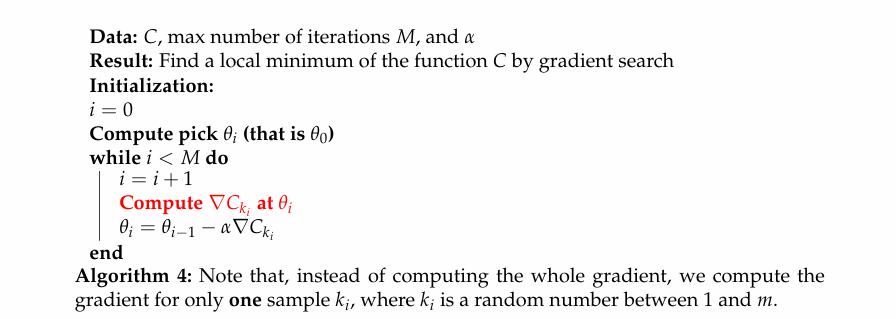

La Figura 3.14 ilustra dos caminos de descenso al minimo. Uno con el **batch gradient descent** (que es con todas las muestras) y el otro con el stochastic gradient descent que es con una sola muestra.



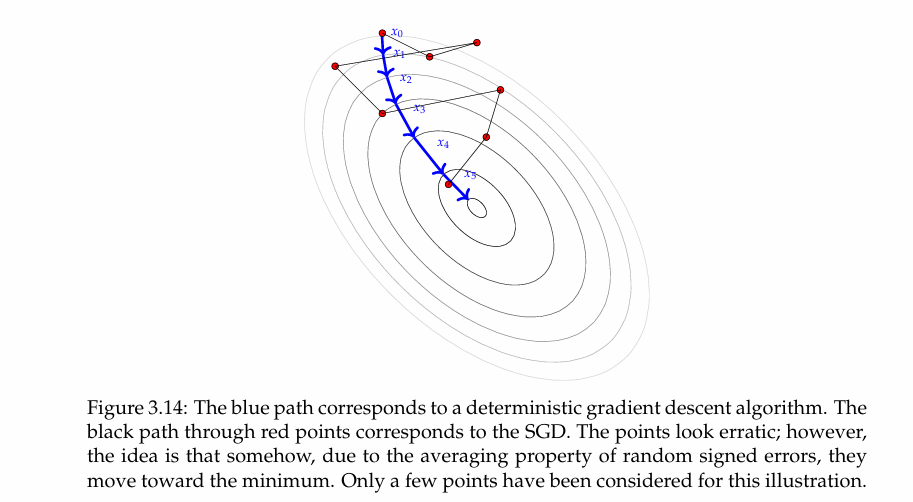

**Ejemplo practico para escplicar el SGD (Stochastic Gradient Descent).
Vamos a pensar en **regresion lineal** (para rectas que pasa por el origen $\theta_0=0$).  Tomamos 5 puntos
$(x_1,y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4), (x_5, y_5)$.
Como $\theta_0=0$
\begin{eqnarray}
y_1 &=& \theta x_1  \\
y_2 &=& \theta x_2  \\
y_3 &=& \theta x_3  \\
y_4 &=& \theta x_4  \\
y_5 &=& \theta x_5  \\
\end{eqnarray}
A no ser que todos los puntos esten alineados estas ecuaciones no tiene solucion.  Usamos minimos cuadrados. La funcion de costo global

$$J(\theta) = \frac15 \sum_{i=1}^5 (\theta x_i - y_i)^2 = \frac15 \sum C_i(\theta) $$
Sin embargo yo puede escribir esto usando funciones de costo locales (por muestra)

$$C_i(\theta) = (\theta x_i - y_i)^2 $$

Estimamos los gradientes locales y global

$$\nabla J(\theta) = \frac{d J}{d \theta} =\frac25 \sum_{i=1}^5 (\theta x_i - y_i) x_i $$
do otro lado

$$\nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 x_i(\theta x_i - y_i) $$

Claramante

$$\nabla J(\theta) = \frac15 \sum_{i=1}^5 \nabla C_i(\theta) $$

Cada funcion de costo local $C_i(\theta)$ es una parabola

$$C_i(\theta) = (\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2  $$

Vamos a asumir los siguiente 5 puntos.

$$(-1,-0.5), (1,1), (3,2), (4,3), (5,6) $$
Estos puntos en las funciones de costo locales $C_i(\theta)$, $i=1,2,3,4,5$

\begin{eqnarray}
C_1(\theta) &=& (-\theta + 0.5)^2 \quad , \quad \text{minimo en} \; \theta=0.5 \\
C_2(\theta) &=& (\theta -1) ^2 \quad , \quad \text{minimo en} \; \theta=1 \\
C_3(\theta) &=& (3 \theta -2) ^2 \quad , \quad \text{minimo en} \; \theta=0.667=2/3 \\
C_4(\theta) &=& (4 \theta -3) ^2 \quad , \quad \text{minimo en} \; \theta=0.75=4/3 \\
C_4(\theta) &=& (5 \theta -6) ^2 \quad , \quad \text{minimo en} \; \theta=1.2=5/6 \\
\end{eqnarray}

La funcion de costo total

$$J(\theta) = \frac15 \left [ (-\theta+0.5)^2 + (\theta -1)^2 + (3 \theta -2)^2 + (4 \theta -3 )^2 + (5 \theta - 6)^2 \right ] $$

Los gradientes locales son

\begin{eqnarray}
\nabla C_1(\theta) &=& -2 ( - \theta + 0.5) \\
\nabla C_2(\theta) &=& 2 (  \theta -1) \\
\nabla C_3(\theta) &=& 6 (  3 \theta -2) \\
\nabla C_4(\theta) &=& 8 (  4 \theta -3) \\
\nabla C_5(\theta) &=& 10 (  5 \theta -6) \\
\end{eqnarray}

El gradiente global esta dado por

$$\nabla J(\theta) = \frac15 [ -2( - \theta + 0.5) + 2(\theta-1) + 6(3 \theta -2) + 8 ( 4 \theta - 3) + 10 (5 \theta - 6). $$





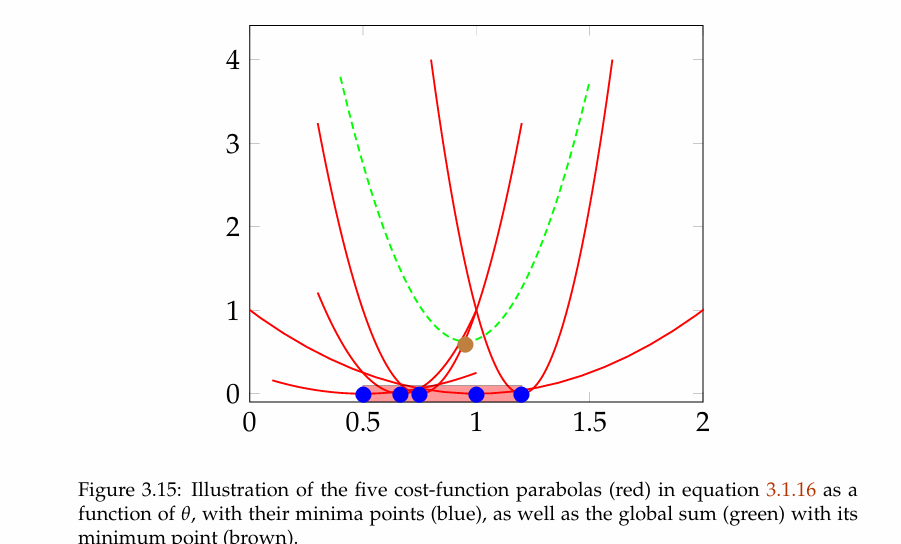

Los puntos azules en la Figura 3.15 corresponden a los minimos locales. Todos estan localizados en una zona que se llama **zona de confusion**. Para este ejemplo si $m = \min \text{de los minimos}$ (en este caso 0.5) y $M$ el
$M = \max \text{de los maximos}$ en este cao $1.2$. Entonces el intervalo cerrado $[m,M] = [0.5, 1.2]$ es la **zona de confusion**.

Cuando regresemos:
1. Que pasa cuando estamos dentro de la zona de confusion.
2. Como podemos estimar la incertidumbre del metodo
3. Como podemos estimar el parametro $\alpha$.

A las 10:45

1 Que pasa cuando estamos en la zona de confusion.
La zona de confusion en $\mathbb{R}^n$ es un hiper-cubo. Veamos un ejemplo en 2D.  Creado co MXNet (Amazon). Figura 3.16

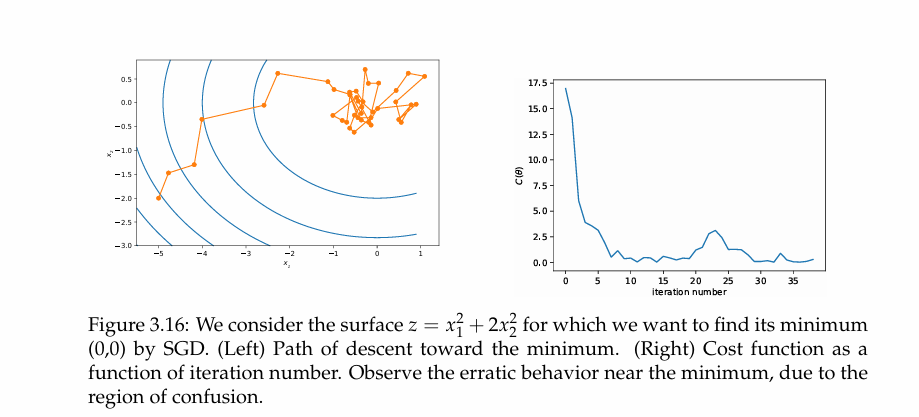

Hay varias cosas que se pueden hacer.
* Mediante la estimacion de la funcion de costo, se puede parar, en ejemplo en la iteracion 15.

* No tiene que llegar al minimo perfecto. ML antes funciona mejor cuando no se acerca demasiado. Esto por un concepto que se llama **overfitting** (sobre ajuste) que lo discutimos dentro de 2 clases (creo yo).

* En este momento, se pueden ajustar parametros.

* Pero otra solucion es **minibatch**. Esto concepto lo discutimos en algunos minutos. En que consiste? en sumar, a partir de este punto, o desde el principio varias muestras (por decir algo 100 muestras en grupitos (minibatch). Estos grupos hacen que la zona de confusi'on se contraiga.

2. Como podemos estimar la incertidumbre del metodo. Vamos a usar estadistica basica.

Asumamos  que las funciones $\nabla C_i(\theta)$ tienen una distribucion estadistica uniforme. Entonces

$$\mathbb{E}[ \nabla C_i(\theta)] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta).  $$
En estadistica a esto lo llaman unbias estimator.

Si la distribucion de los gradientes no es uniforme sino que tiene un masa $\mu_i$ entonces

$$\mathbb{E}[ \nabla C_i(\theta)] =  \sum_{i=1}^m \mu_i \nabla C_i(\theta) = \nabla J(\theta).  $$

Que tan dispersa es la zona de confusion. Esto se puede medir con la varianza.


 $$\mathbb{V}[ \nabla C_i(\theta)] =\frac{1}{1 - m} \sum_{i=1}^m \| \nabla C_i(\theta) - \nabla J(\theta) \|^2 $$

 Si la varianza se puediera reducir, muy bueno. Por ejemplo si el gradiente es constante entonces la varianza es 0. Pero esto es poco comun.



 Una forma de disminuir la varianza es sumando algunas muestras. Por ejemplo si tuvieramos un millon de muestras $m=1000000$, podemos tomar "buckets" (valdesitos) de 1000 muestras y sumar los gradiente en ellos. Esto da lugar al metodo llamado **minibatch**.

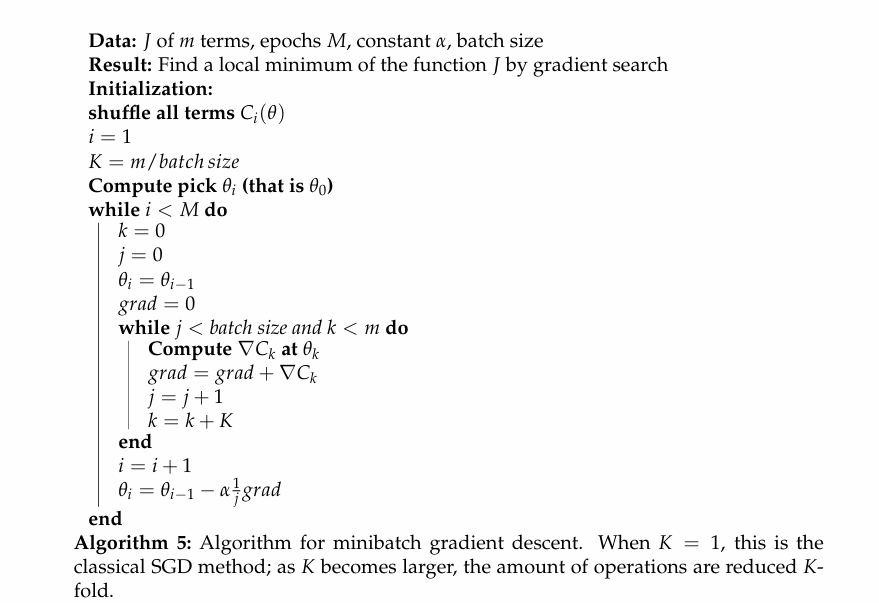

El minibatch es el mejor de los dos mundos. No es muy costoso por iteraci'on y suaviza la zona de confusion haciendola mas pequenha, reduciendo la varianza.

En resumen: En la practica de ML no se usa CG, ni SD , ni non-linear CG (para redes neuronales) se usan:

* SGD: Stochastic Gradient Descent (es muy tacanho. Usa una sola muestra por iteracion.
* Minibatch Gradient descent (el mejor de los dos mundos. Suaviza la zona de confusion.
* Batch Gradient descent (es el tradicional pero muy costoso). La zona de confusion es un punto.



3. Como ppodemos estimar el hiper-parametro $\alpha$.
Este lo hemos discutido en detalle varias veces.
* Es analitico para CG, SD (pero poco util para problemas altamente no lineales)
* Discutimos aproximaciones (back-tracking, prueba y error, 3 puntos y hallar el minimo de la parabola).

* En redes neuronales, nada de eso se usa. Existen metodos que se inventaron desde los 60s. Estos los ensenho en DL (Deep Learning). Los menciono por encima.

**Aceleradores de Gradiente**:
En general $\alpha$ aca puede ser variable. Estos son los metodos que ensenho en DL.

1. Momentum (Poliak, ruso en 1962 ??)
2. Nesterov (Alumno de Poliak. Tesis de doctorado, 1965??)
3. AdaGrad (Adaptive Gradient)
4. AdaDelta
5. RMSProp (Geoffrey Hinton)
6. Adam

Consejo para proceder con formular y resolver modelos.

1. Encontrar o definir la funcion de costo $J(\theta)$.
2. Hallar el gradiente de la funcion de costo $\nabla J(\theta)$.
3. Formula el proceso iterativo
$$\theta^{(i)} = \theta^{(i-1)} - \alpha \nabla J(\theta) $$
Esto implica un estimado de $\alpha$????
4. Evaluar (test, estimate accuracy).  Ir en ciclos.
Puede necesitar mas datos, o cambiar hiperparametros.


# Mas dimensiones ( more features).
Recuerden el problema de la casa. En la introduccion a regresion lineal usamos solo un parametro (el area de la casa). Podemos pensar en varios parametros, como por ejemplo el numero de cuartos junto con el area. En este caso
la hipotesis seria de la forma.

$$h(\theta_0, \theta_1, \theta_1, x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 . $$

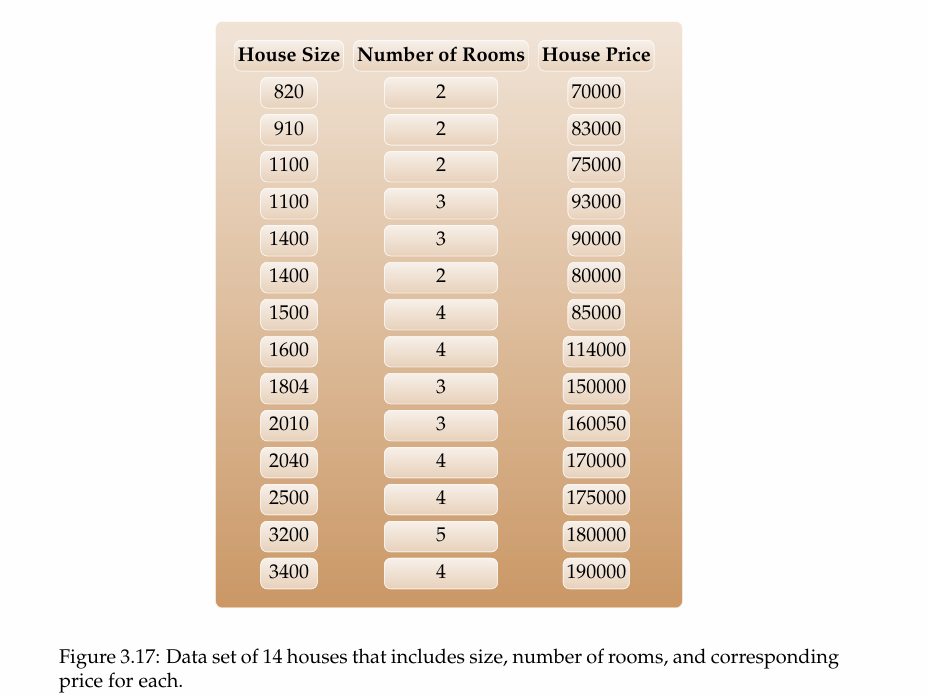

El problema de ajustar los datos a las etiqu3tas (los precios) columna de la derecha. Tambien se puede formular de la forma $A x = b$.

$$h(\theta_0, \theta_1, \theta_1, x_1, y_1) = \theta_0 + \theta_1 x_1 + \theta_2 y_1 . $$
$$h(\theta_0, \theta_1, \theta_1, x_2, y_2) = \theta_0 + \theta_1 x_2 + \theta_2 y_2 . $$
$$h(\theta_0, \theta_1, \theta_1, x_3, y_3) = \theta_0 + \theta_1 x_3 + \theta_2 y_3 . $$
$$\vdots $$

$$h(\theta_0, \theta_1, \theta_1, x_m, y_m) = \theta_0 + \theta_1 x_m + \theta_2 y_m . $$
En este caso

$$
\begin{pmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
\vdots & \vdots & \vdots \\
1 & x_m & y_m \\
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y
\end{pmatrix}
$$
Esto es **regresion lineal multivariada**.
El problema se formula como

$$X \theta = y \tag{1} $$
En general, para regresion podemos tener mas muestras que "features" (atributos) en este ejemplo solo hay 2 atributos.
entonces si premultiplicamos la Ecuacion (1) por $X^T $

$$X^T X \theta = X^T y $$
y $X^T X$ es no-singular (invertible) por que las columnas son linealmente independientes (pruebelo). Si dudamos entonces regularizamos

$$(X^T X + \lambda I)  \theta = X^T y $$
$\lambda>0$, $\lambda \ll 1$.  Este problema define una matriz
$$A = X^T X + \lambda I $$
que es positiva definida.
Sobre esta se recomienda $CG$.
La solucion analitica es

$$\theta = A^{-1}y $$
Si las dimensiones son muchas, no se deben resolver las ecuaciones normales de forma analitica. Se usan metodos de gradiente.  

En la siguiente clase continuamos con

* Mas dimensiones
* Reregresion polinomica y mas general (no lineal en $x$)
* Normalizacion.